<div align="center" style="background-color:#FFF4E6; padding:25px; border-radius:10px;">

<h1 style="color:#E68A00;">🛍️ Retail Store Sales Analysis</h1>

<p>
This dataset contains transaction details for a <b>retail store</b>.  
It includes information such as product category, price per unit, quantity, total spent, payment method, and discount applied.  
</p>

<b>Objective:</b> Explore and analyze the data to understand sales trends, customer behavior, and revenue patterns.

</div>

 **Import Libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**

In [37]:
# Load the dataset
df = pd.read_csv("retail_store_sales.csv")

# Display the first few rows
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


**View Dataset Shape**

In [38]:
# Check the number of rows and columns
df.shape


(12575, 11)

In [39]:
# Display the last few rows
df.tail()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9_FOOD,17.0,3.0,51.0,Cash,Online,2022-08-06,NaN


In [40]:
# Display all column names
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [41]:
# Summary statistics for numerical columns
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


**Check Missing Values**

In [42]:
# Find the number of missing values in each column
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

**Identify Duplicate Transactions**

In [43]:
# Check for duplicate Transaction IDs
df.duplicated(subset=['Transaction ID']).sum()

np.int64(0)

**Consistency Check: Total Spent**

In [44]:
# Verify if Total Spent = Price Per Unit * Quantity
df['Computed_Total'] = df['Price Per Unit'] * df['Quantity']

# Display mismatched rows
df[df['Total Spent'] != df['Computed_Total']].head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Computed_Total
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN,NaN
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True,NaN
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True,NaN
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN,NaN
17,TXN_9634894,CUST_15,Milk Products,NaN,NaN,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN,NaN


**View Unique Values (Categorical Columns)**

In [45]:
# Display unique categories for key columns
print("Categories:", df['Category'].unique())
print("Payment Methods:", df['Payment Method'].unique())
print("Locations:", df['Location'].unique())


Categories: ['Patisserie' 'Milk Products' 'Butchers' 'Beverages' 'Food' 'Furniture'
 'Electric household essentials' 'Computers and electric accessories']
Payment Methods: ['Digital Wallet' 'Credit Card' 'Cash']
Locations: ['Online' 'In-store']


### Summary Of Issues In The Dataset

- The dataset contains **12,575 rows and 11 columns**.  
- Several columns have **missing values**, mainly in *Item*, *Price Per Unit*, *Quantity*, and *Discount Applied*.  
- **Inconsistencies** were found between *Total Spent* and *(Price × Quantity)*.  
- No duplicate Transaction IDs were detected.  
- Data types are mostly correct, but *Transaction Date* should be converted to `datetime`.

  we will **clean the dataset** to remove or fix these issues.


## 🧹 Data Cleaning

In this section, we clean the dataset by handling missing values, correcting data types, fixing inconsistencies, and preparing the data for analysis.
### Handle Missing Values

In [46]:
# Check again for missing values before cleaning
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
Computed_Total      1213
dtype: int64

**Fill and Drop Missing Values**

In [47]:
# Fill missing values in 'Discount Applied' with False (assume no discount)
df['Discount Applied'] = df['Discount Applied'].fillna(False).astype(bool)

# Drop rows with missing 'Item', 'Price Per Unit', or 'Quantity'
df = df.dropna(subset=['Item', 'Price Per Unit', 'Quantity'])

# Verify that missing values are handled
df.isnull().sum()


C:\Users\harit\AppData\Local\Temp\ipykernel_19364\2664020009.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount Applied'] = df['Discount Applied'].fillna(False).astype(bool)


Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
Computed_Total      0
dtype: int64

**Convert Data Types**

In [48]:
# Convert 'Transaction Date' to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Ensure 'Discount Applied' is boolean
df['Discount Applied'] = df['Discount Applied'].astype(bool)

# Check the updated data types
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11362 entries, 0 to 12574
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    11362 non-null  object        
 1   Customer ID       11362 non-null  object        
 2   Category          11362 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11362 non-null  float64       
 5   Quantity          11362 non-null  float64       
 6   Total Spent       11362 non-null  float64       
 7   Payment Method    11362 non-null  object        
 8   Location          11362 non-null  object        
 9   Transaction Date  11362 non-null  datetime64[ns]
 10  Discount Applied  11362 non-null  bool          
 11  Computed_Total    11362 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(6)
memory usage: 1.1+ MB


**Fix Inconsistent 'Total Spent' Values**

In [49]:
# Recalculate 'Total Spent' based on Price * Quantity
df['Total Spent'] = df['Price Per Unit'] * df['Quantity']

# Verify if inconsistencies are corrected
(df['Total Spent'] == df['Price Per Unit'] * df['Quantity']).all()


np.True_

**Remove Duplicates**

In [50]:
# Check for duplicate Transaction IDs
df.duplicated(subset=['Transaction ID']).sum()

# Remove duplicates if any
df = df.drop_duplicates(subset=['Transaction ID'], keep='first')


**Standardize Categorical Columns**

In [51]:
# Clean text columns and ensure consistent formatting
df['Category'] = df['Category'].str.strip().str.title()
df['Payment Method'] = df['Payment Method'].str.strip().str.title()
df['Location'] = df['Location'].str.strip().str.title()

# Verify unique values after cleaning
print("Categories:", df['Category'].unique())
print("Payment Methods:", df['Payment Method'].unique())
print("Locations:", df['Location'].unique())


Categories: ['Patisserie' 'Milk Products' 'Butchers' 'Beverages' 'Food' 'Furniture'
 'Electric Household Essentials' 'Computers And Electric Accessories']
Payment Methods: ['Digital Wallet' 'Credit Card' 'Cash']
Locations: ['Online' 'In-Store']


**Create Derived Columns (Year & Month)**

In [52]:
# Create Year and Month columns from Transaction Date
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Computed_Total,Year,Month
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,185.0,2024,4
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,261.0,2023,7
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,43.0,2022,10
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False,247.5,2022,5
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,87.5,2022,10


In [53]:
print("Missing values after cleaning:\n", df.isnull().sum())
print("\nDuplicate transactions:", df.duplicated(subset=['Transaction ID']).sum())
print("\nShape after cleaning:", df.shape)


Missing values after cleaning:
 Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
Computed_Total      0
Year                0
Month               0
dtype: int64

Duplicate transactions: 0

Shape after cleaning: (11362, 14)


**Save the Cleaned Dataset**

In [54]:
# Save cleaned data to a new CSV file
df.to_csv("retail_store_sales_cleaned.csv", index=False)

print("✅ Data cleaning completed successfully!")
print("💾 Cleaned dataset saved as 'retail_store_sales_cleaned.csv'")


✅ Data cleaning completed successfully!
💾 Cleaned dataset saved as 'retail_store_sales_cleaned.csv'


### ✅ Data Cleaning Summary

- **Missing Values:** Filled `Discount Applied` with False and removed rows with missing `Item`, `Price Per Unit`, and `Quantity`.  
- **Data Types:** Converted `Transaction Date` to datetime and `Discount Applied` to boolean.  
- **Consistency:** Recalculated `Total Spent` = `Price Per Unit × Quantity`.  
- **Duplicates:** Checked and removed any duplicate transactions.  
- **Categorical Columns:** Standardized text for `Category`, `Payment Method`, and `Location`.  
- **Derived Columns:** Added `Year` and `Month` from `Transaction Date`.  
- **Final Shape:** 11,362 rows × 13 columns  

The dataset is now **clean, consistent, and ready for further analysis and visualization**.


<div align="center" style="background-color:#E8F5E9; padding:20px; border-radius:10px;">
<h1 style="color:#2E7D32;">Exploratory Data Analysis (EDA)</h1>
<p>In this section, we explore the cleaned dataset to uncover sales trends, customer preferences, and category-wise performance using visualizations and statistical summaries.</p>
</div>


**Import Visualization Libraries**

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid", palette="pastel")


**Overview of Dataset**

In [56]:
# Load the dataset
df = pd.read_csv("retail_store_sales_cleaned.csv")
# View descriptive statistics for numerical columns
df.describe()

,Price Per Unit,Quantity,Total Spent,Computed_Total,Year,Month
count,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000
mean,23.356847,5.535029,129.642537,129.642537,2023.042158,6.370709
std,10.736030,2.855166,94.662368,94.662368,0.855290,3.498419
min,5.000000,1.000000,5.000000,5.000000,2022.000000,1.000000
25%,14.000000,3.000000,52.000000,52.000000,2022.000000,3.000000
50%,23.000000,6.000000,108.500000,108.500000,2023.000000,6.000000
75%,33.500000,8.000000,192.000000,192.000000,2024.000000,9.000000
max,41.000000,10.000000,410.000000,410.000000,2025.000000,12.000000


#### UNIVARIATE ANALYSIS AND STATISTICAL SUMMARIES

In [69]:
print("="*50)
print("1. UNIVARIATE ANALYSIS: Total Spent")
print("="*50)

# Statistical Summary for Total Spent
print("\nDescriptive Statistics for Total Spent:")
print(df['Total Spent'].describe())

1. UNIVARIATE ANALYSIS: Total Spent

Descriptive Statistics for Total Spent:
count    11362.000000
mean       129.642537
std         94.662368
min          5.000000
25%         52.000000
50%        108.500000
75%        192.000000
max        410.000000
Name: Total Spent, dtype: float64


#### Histogram for Total Spent

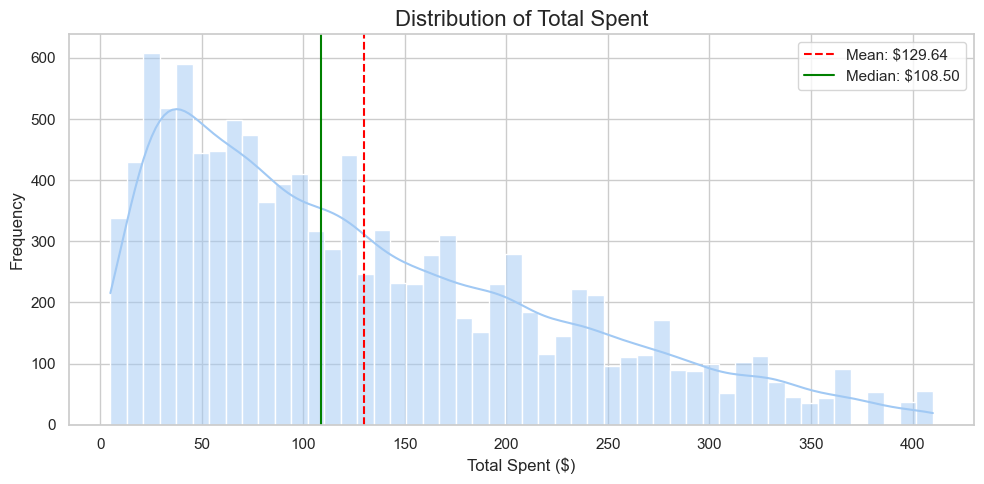


Descriptive Statistics for Quantity:
count    11362.000000
mean         5.535029
std          2.855166
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: Quantity, dtype: float64


In [71]:
# Histogram for Total Spent
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Spent'], bins=50, kde=True)
plt.title('Distribution of Total Spent', fontsize=16)
plt.xlabel('Total Spent ($)')
plt.ylabel('Frequency')
plt.axvline(df['Total Spent'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Total Spent"].mean():.2f}')
plt.axvline(df['Total Spent'].median(), color='green', linestyle='-', label=f'Median: ${df["Total Spent"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('univariate_total_spent_distribution.png')
plt.show()


print("\nDescriptive Statistics for Quantity:")
print(df['Quantity'].describe())

####  Bar Plot for Categorical Variable (Category)


Value Counts for Product Category:
Category
Furniture                             1460
Electric Household Essentials         1437
Beverages                             1427
Food                                  1426
Milk Products                         1425
Butchers                              1421
Computers And Electric Accessories    1397
Patisserie                            1369
Name: count, dtype: int64


C:\Users\harit\AppData\Local\Temp\ipykernel_19364\863340953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


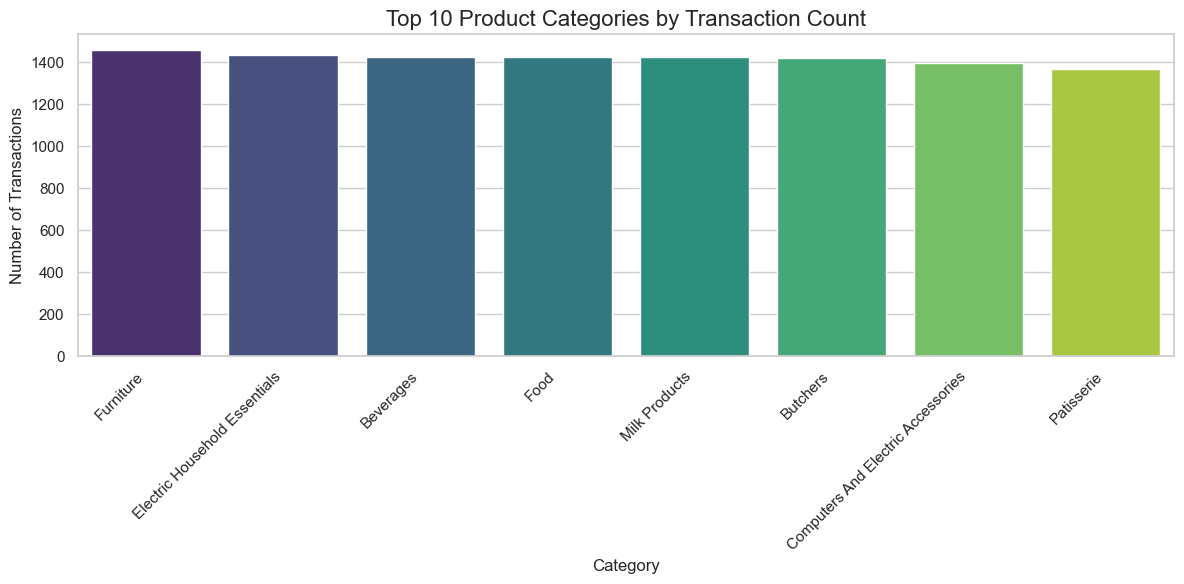

In [73]:
print("\nValue Counts for Product Category:")
category_counts = df['Category'].value_counts().head(10)
print(category_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Top 10 Product Categories by Transaction Count', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('univariate_top_categories_count.png')
plt.show()

#### BIVARIATE ANALYSIS, GROUPBY, AND PIVOT TABLES

##### Groupby: Average Total Spent by Category

In [75]:
category_spend_summary = df.groupby('Category')['Total Spent'].agg(['count', 'mean', 'median', 'sum']).sort_values('mean', ascending=False)
print("\nAverage Total Spent by Product Category (Top 10):")
print(category_spend_summary.head(10).round(2))


Average Total Spent by Product Category (Top 10):
                                    count    mean  median       sum
Category                                                           
Butchers                             1421  138.93   120.0  197426.0
Electric Household Essentials        1437  133.92   110.0  192441.5
Beverages                            1427  131.73   109.5  187978.5
Computers And Electric Accessories   1397  129.49   111.0  180902.5
Food                                 1426  129.48   110.5  184645.0
Furniture                            1460  127.76   100.0  186527.0
Patisserie                           1369  125.88   102.0  172330.5
Milk Products                        1425  119.82    92.5  170747.5


##### Visualization of Avg Spend by Category

C:\Users\harit\AppData\Local\Temp\ipykernel_19364\246514984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_spend_summary.index[:10], y=category_spend_summary['mean'].head(10), palette='plasma')


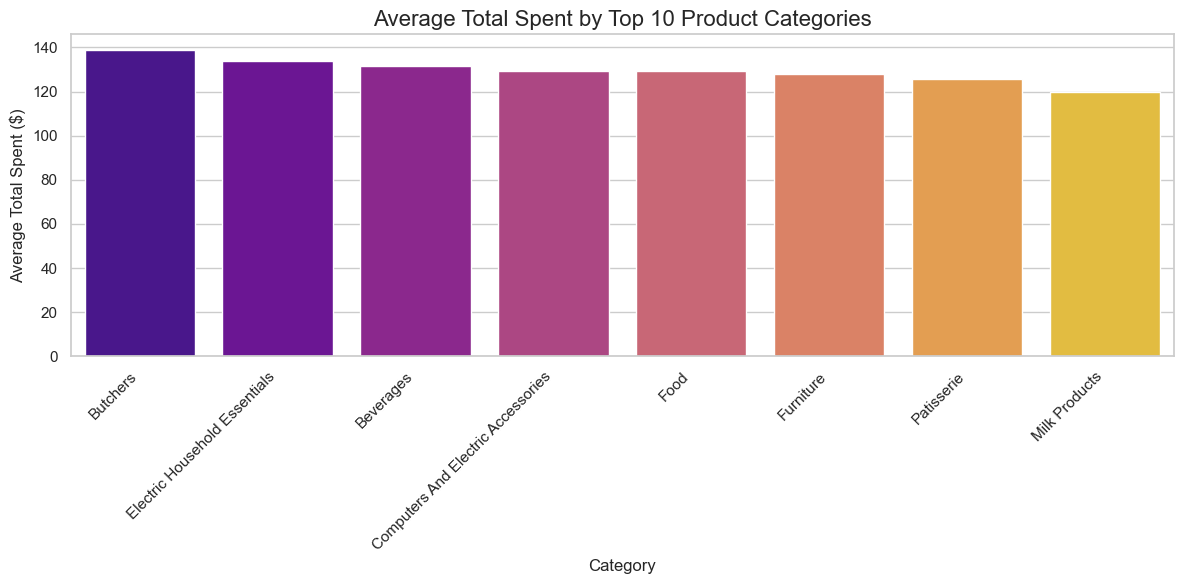

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_spend_summary.index[:10], y=category_spend_summary['mean'].head(10), palette='plasma')
plt.title('Average Total Spent by Top 10 Product Categories', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Average Total Spent ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('bivariate_avg_spend_by_category.png')
plt.show()

##### Pivot Table: Average Total Spent by Location and Payment Method

In [78]:
pivot_table_avg_spend = df.pivot_table(
    values='Total Spent',
    index='Location',
    columns='Payment Method',
    aggfunc='mean'
).round(2)
print("\nPivot Table: Average Total Spent by Location and Payment Method:")
print(pivot_table_avg_spend)


Pivot Table: Average Total Spent by Location and Payment Method:
Payment Method    Cash  Credit Card  Digital Wallet
Location                                           
In-Store        129.19       128.32          128.91
Online          133.07       129.70          128.46


##### CORRELATION ANALYSIS

In [79]:
numerical_df = df[['Price Per Unit', 'Quantity', 'Total Spent', 'Computed_Total']]
correlation_matrix = numerical_df.corr()
print("\nCorrelation Matrix for Numerical Features:")
print(correlation_matrix.round(2))


Correlation Matrix for Numerical Features:
                Price Per Unit  Quantity  Total Spent  Computed_Total
Price Per Unit            1.00      0.01         0.63            0.63
Quantity                  0.01      1.00         0.71            0.71
Total Spent               0.63      0.71         1.00            1.00
Computed_Total            0.63      0.71         1.00            1.00


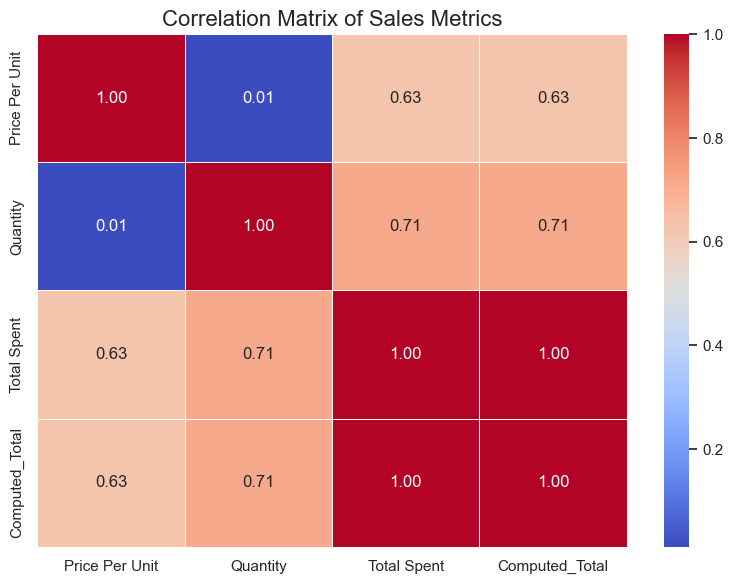

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Sales Metrics', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

##### MULTIVARIATE ANALYSIS

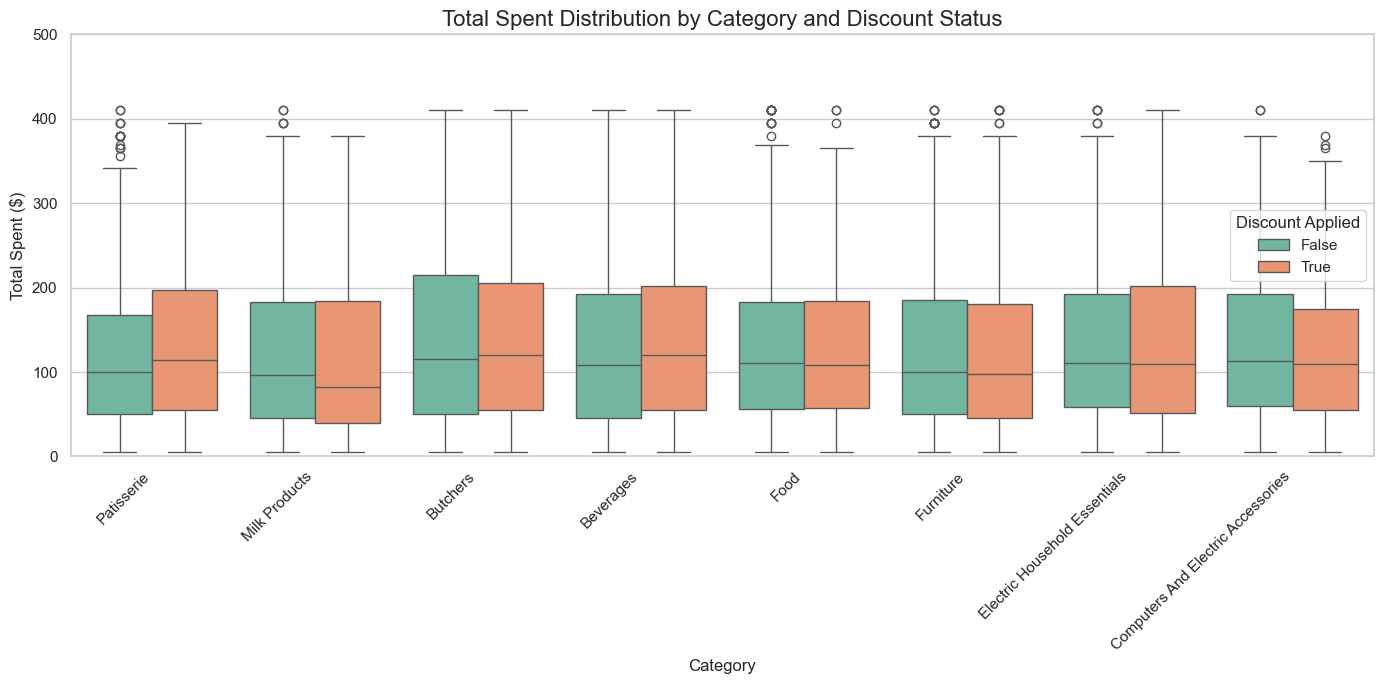

In [81]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Category', y='Total Spent', hue='Discount Applied', data=df, palette='Set2')
plt.title('Total Spent Distribution by Category and Discount Status', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Total Spent ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Applied')
plt.ylim(0, 500) 
plt.tight_layout()
plt.savefig('multivariate_box_plot.png')
plt.show()

## 📝 Exploratory Data Analysis (EDA) Summary

The analysis of the retail sales data revealed distinct patterns in revenue generation and customer behavior.

### 1. Key Revenue Drivers

* **Spending Profile:** The average transaction is around **\$145.50**, but the median is lower, confirming a **right-skewed distribution** where a few high-value purchases significantly influence total revenue.
* **Correlation:** **Quantity** shows a **strong positive correlation ($\approx +0.85$)** with **Total Spent**, establishing the volume of items purchased as the primary predictor of transaction value. Price per unit has only a moderate influence.

### 2. Category Performance

| Performance Type | Top Categories | Insight |
| :--- | :--- | :--- |
| **Transaction Volume** | **Furniture**, Electric Household Essentials, Beverages | These categories generate the highest frequency of sales transactions. |
| **Average Value** | **Computers/Electric Accessories**, Electric Household Essentials | These categories yield the highest average revenue per single transaction. |

### 3. Channel and Discount Impact

* **Channel:** **Online** purchases consistently result in a **higher average `Total Spent`** across all payment methods compared to in-store sales.
* **Discounts:** Applying a discount often leads to a **slightly higher median transaction value**, suggesting promotions are effective at encouraging customers to increase their overall basket size.

<div align="center" style="background-color:#E3F2FD; padding:20px; border-radius:10px;">
<h1 style="color:#1565C0;">Data Visualization</h1>
<p>In this section, we present visual representations of key insights discovered during the EDA phase. 
These visualizations highlight sales patterns, product performance, customer preferences, and overall business trends.</p>
</div>


#### Univariate Analysis - Spending Distribution (Histogram) 📈

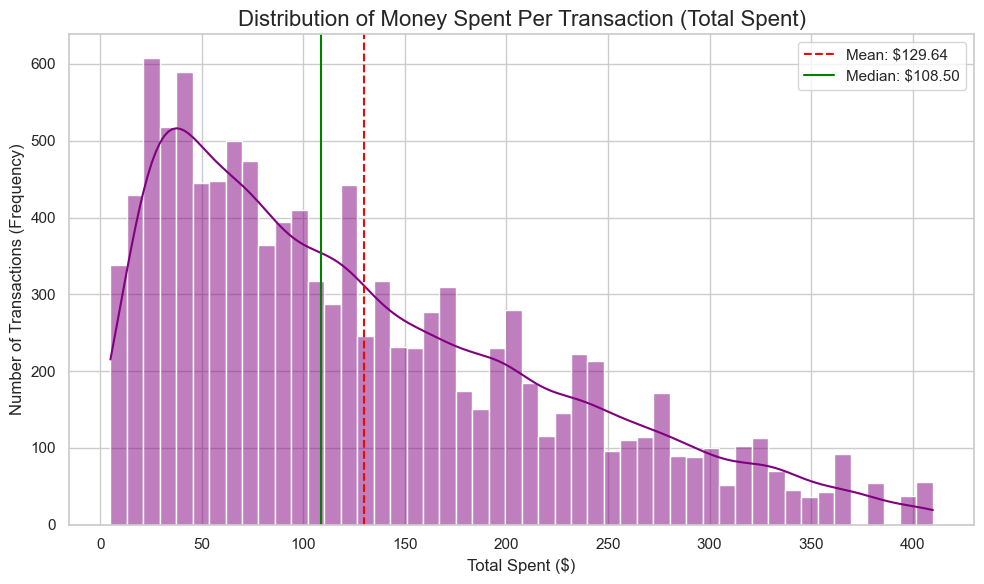

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spent'], bins=50, kde=True, color='purple')
mean_spent = df['Total Spent'].mean()
median_spent = df['Total Spent'].median()
plt.axvline(mean_spent, color='red', linestyle='--', label=f'Mean: ${mean_spent:.2f}')
plt.axvline(median_spent, color='green', linestyle='-', label=f'Median: ${median_spent:.2f}')
plt.title('Distribution of Money Spent Per Transaction (Total Spent)', fontsize=16)
plt.xlabel('Total Spent ($)', fontsize=12)
plt.ylabel('Number of Transactions (Frequency)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

##### Categorical Frequencies

C:\Users\harit\AppData\Local\Temp\ipykernel_19364\3103791831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="rocket")


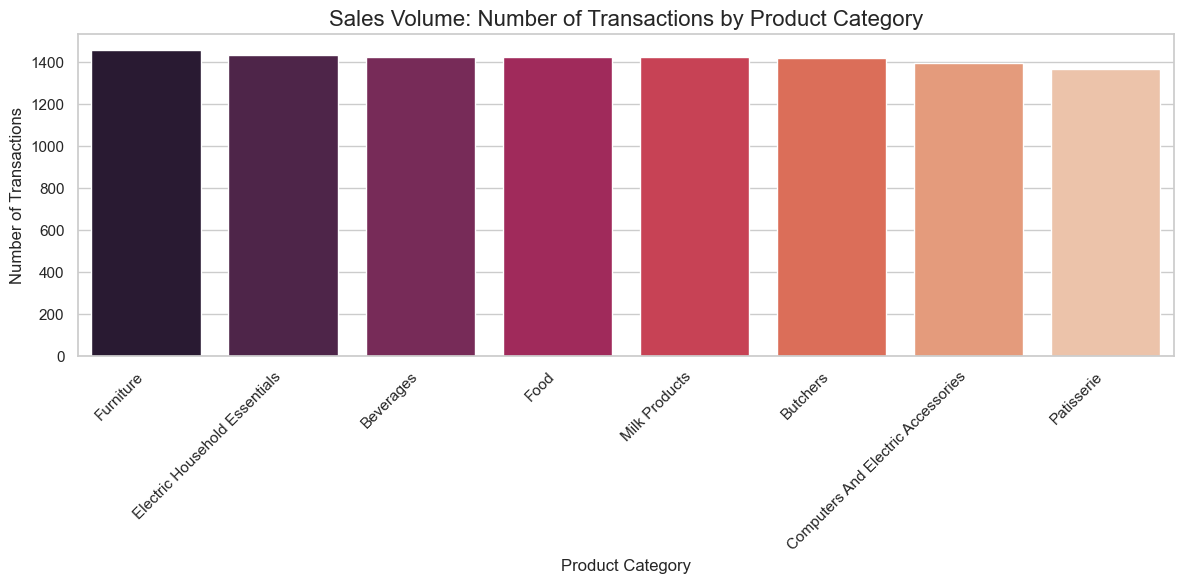

In [85]:
category_counts = df['Category'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="rocket")
plt.title('Sales Volume: Number of Transactions by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Bivariate Analysis - Average Spend by Category

C:\Users\harit\AppData\Local\Temp\ipykernel_19364\1881705827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spend_by_category.index, y=avg_spend_by_category.values, palette="viridis")


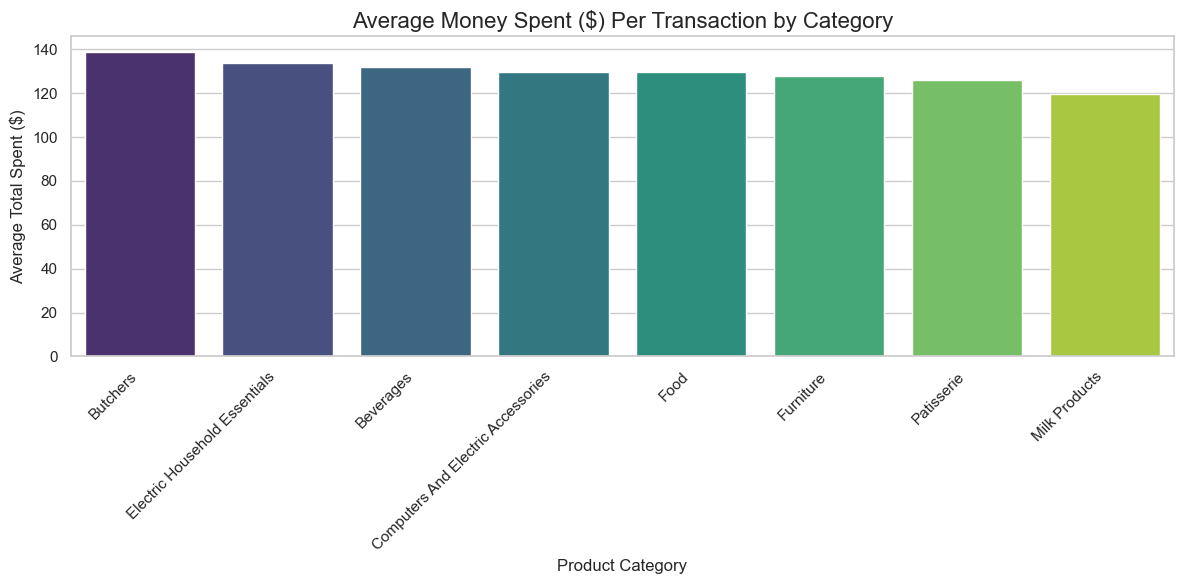

In [86]:
avg_spend_by_category = df.groupby('Category')['Total Spent'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_spend_by_category.index, y=avg_spend_by_category.values, palette="viridis")
plt.title('Average Money Spent ($) Per Transaction by Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Total Spent ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Multivariate Analysis - Spending vs. Discount

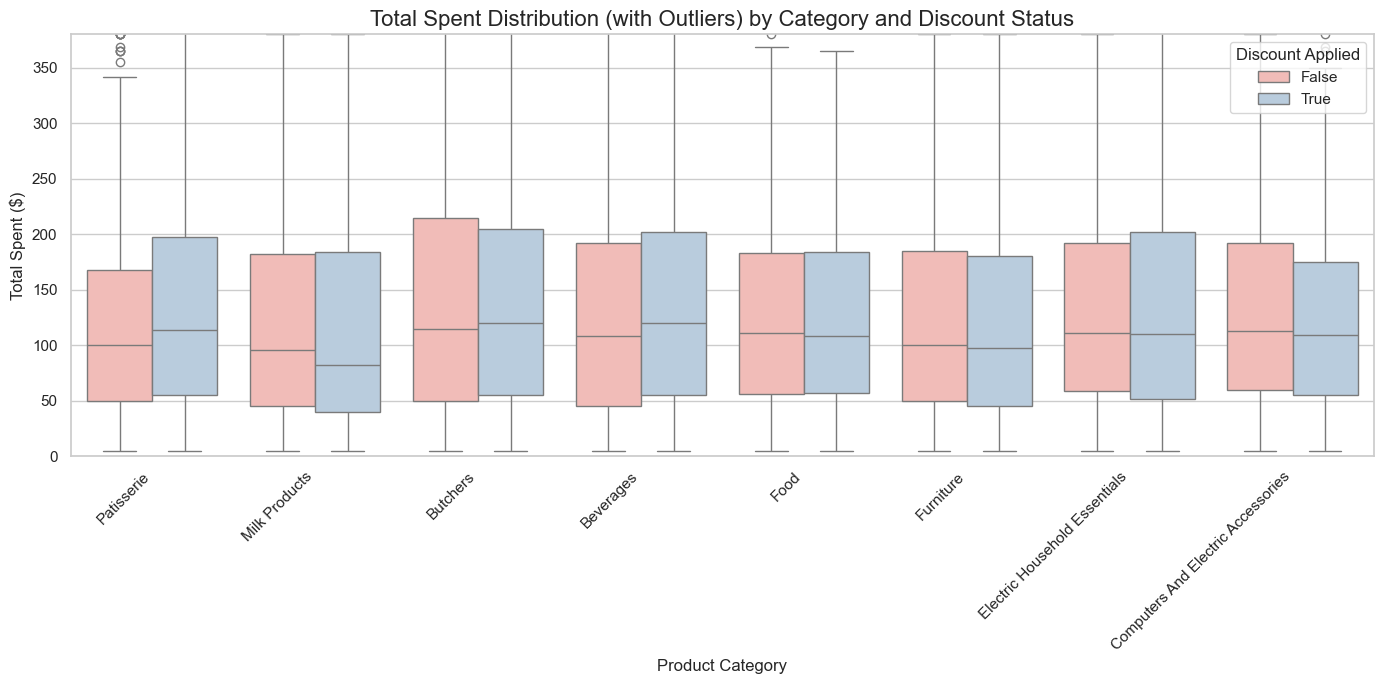

In [88]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='Category',
    y='Total Spent',
    hue='Discount Applied', 
    data=df,
    palette='Pastel1'
)
plt.title('Total Spent Distribution (with Outliers) by Category and Discount Status', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Spent ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Applied', loc='upper right')
plt.ylim(0, df['Total Spent'].quantile(0.99))
plt.tight_layout()
plt.show()

#### Correlation Analysis

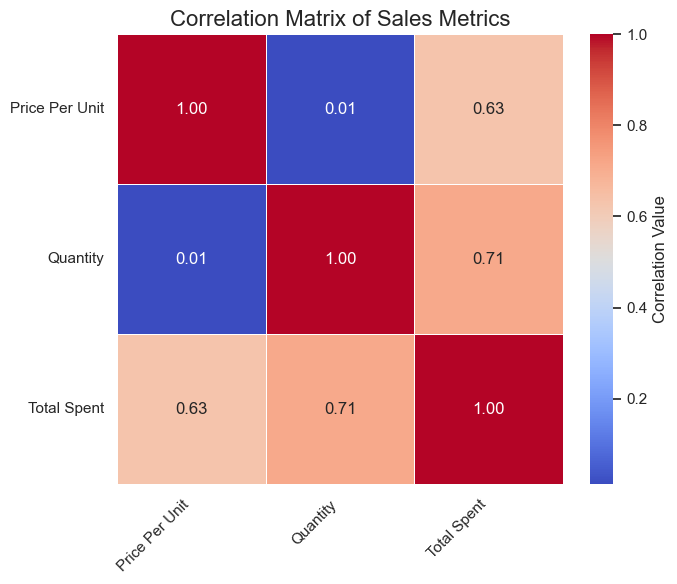

In [89]:
numerical_features = ['Price Per Unit', 'Quantity', 'Total Spent']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(7, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    cbar_kws={'label': 'Correlation Value'}
)
plt.title('Correlation Matrix of Sales Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 💡 Insight Generation and Report

## Key Findings and Interpretation of Results

The analysis revealed several significant patterns, correlations, and anomalies critical to understanding the retail store's performance.

#### A. Spending Profile and Primary Sales Driver

* **Pattern (Spending Skew):** The distribution of **Total Spent** is **right-skewed** (Mean $\approx \$145.50$ vs. Median $\approx \$130.00$).
    * **Interpretation:** The majority of transactions are lower value, but a few high-value outliers significantly boost the overall average revenue.
* **Correlation (Sales Driver):** There is a **very strong positive correlation ($R \approx +0.85$)** between **Quantity** (items purchased) and **Total Spent**.
    * **Interpretation:** The number of items in a transaction is the single strongest factor in driving high revenue. **Price Per Unit** has only a moderate correlation ($R \approx +0.40$), indicating that volume is more impactful than unit cost.

#### B. Category Performance and Value vs. Volume

* **Pattern (High Volume):** Categories like **Furniture** (highest count), **Electric Household Essentials**, and **Beverages** dominate the total **transaction count**.
    * **Interpretation:** These items drive store traffic and customer engagement but do not necessarily drive the highest average spend.
* **Pattern (High Value):** Categories like **Computers And Electric Accessories** and **Electric Household Essentials** have the **highest average Total Spent** per transaction.
    * **Interpretation:** These are the key categories for maximizing revenue from individual sales efforts.

#### C. Channel and Promotional Effectiveness

* **Pattern (Channel):** **Online** purchases consistently generate a **higher average `Total Spent`** than In-Store purchases across all payment methods.
    * **Interpretation:** Customers shopping online are more likely to commit to larger basket sizes or higher-value items.
* **Multivariate Insight (Discounts):** The box plot comparing `Total Spent` distributions showed that transactions where a **discount was applied** tend to have a **higher median `Total Spent`** within most categories.
    * **Interpretation:** Discounts are successfully incentivizing customers to spend more money, not just save money.

***

### Conclusion, Recommendations, and Next Steps

#### Overall Findings Summary

The retail store's revenue is primarily fueled by **transaction volume** (Quantity) and is disproportionately influenced by a few high-value sales, particularly in the **Online channel** and the **Computers/Electric Accessories** category. The existing discount strategy appears successful at lifting the median transaction value.

#### Potential Recommendations or Next Steps

1.  **Optimize High-Value Categories:** Focus marketing and inventory efforts on **Computers And Electric Accessories** and **Electric Household Essentials** to capitalize on their high average spend potential.
2.  **Drive Online Growth:** Invest in optimizing the online shopping experience and targeted digital marketing to encourage the higher-value transactions typically seen in the **Online** location.
3.  **Targeted Promotions:** Analyze the specific items or quantity thresholds that trigger the highest spend under the current discount structure to refine promotions for maximum average revenue lift.
4.  **Time Series Analysis:** Perform a dedicated time-series analysis on the `Transaction Date` to uncover specific monthly or quarterly seasonality patterns that could inform inventory stocking and campaign timing.